# ============================================================
# Assignment: Perceptron & Activation Functions
# ============================================================
---

## Instructions:
- This assignment contains **two parts**.
- Fill in all code and explanation sections where indicated.
- Do NOT use high-level ML libraries like TensorFlow or PyTorch for implementation.
- You may use NumPy, Matplotlib, and scikit-learn for dataset generation and visualization.
---

## Part 1 — Perceptron from Scratch

### Q1. Dataset Preparation
1. Generate a **2D dataset** with 2 classes using `make_blobs` from scikit-learn.
2. Convert labels so that one class is `-1` and the other is `1`.
3. Visualize the dataset using a scatter plot.

**Your Task:**

- Write the code to generate and visualize the dataset.
- Provide the plot in your answer.


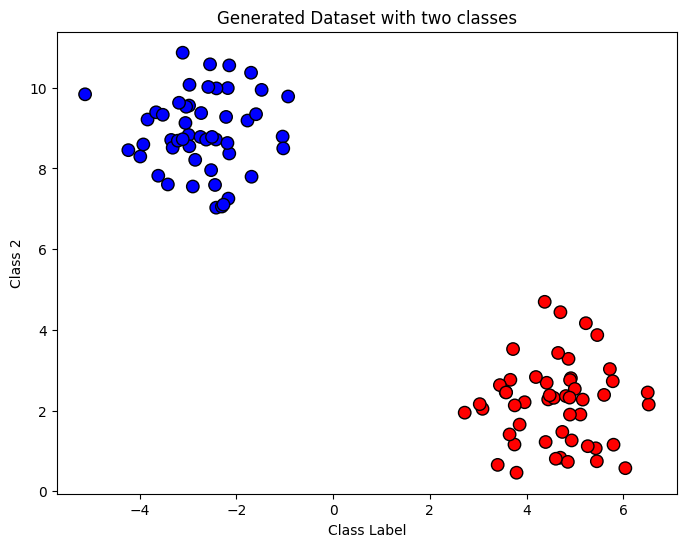

In [1]:
# Your code here to generate dataset and plot

from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
y = np.where(y == 0, -1, 1)  

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap= 'bwr', edgecolors='k', s=80)
plt.xlabel('Class Label')
plt.ylabel('Class 2')
plt.title('Generated Dataset with two classes')
plt.show()

### Q2. Perceptron Implementation
1. Create a Python class `Perceptron` with:
   - `__init__` — initializes learning rate, number of epochs, and weights/bias.
   - `fit(X, y)` — trains the perceptron using the **Perceptron Learning Rule**.
   - `predict(X)` — returns predictions for given input features.
2. Use the update rule:  
$$
w \gets w + \eta (y_i - \hat{y}_i) x_i
$$
3. Train the Perceptron on your dataset.

**Your Task:**
- Implement and train the Perceptron.
- Display the final weights and bias.


In [ ]:
# Your Perceptron class implementation here

class Perceptron:
    
    # Initialising the learning rate, number of epochs and weights/bias
    def __init__(self, learning_rate=0.01, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    # Fitting and training
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                y_pred = np.sign(np.dot(x_i, self.weights) + self.bias)
                
                if y_pred == 0:
                    y_pred = 1
                    
                self.weights += self.lr * (y[idx] - y_pred ) * x_i
                self.bias +=  self.lr * (y[idx] - y_pred)
                
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)
                


In [3]:
# Train your Perceptron and print weights, bias here


perceptron = Perceptron(learning_rate=0.1, epochs=10)

perceptron.fit(X, y)

print("Final weights:", perceptron.weights)
print("final bias:", perceptron.bias)


Final weights: [ 1.74226039 -1.16033108]
final bias: 0.0


### Q3. Decision Boundary
1. Write a function to plot the decision boundary of your trained perceptron.
2. Visualize the boundary along with the dataset.

**Your Task:**
- Provide the decision boundary plot.
- Explain in **2–3 sentences** how the perceptron separates the two classes.


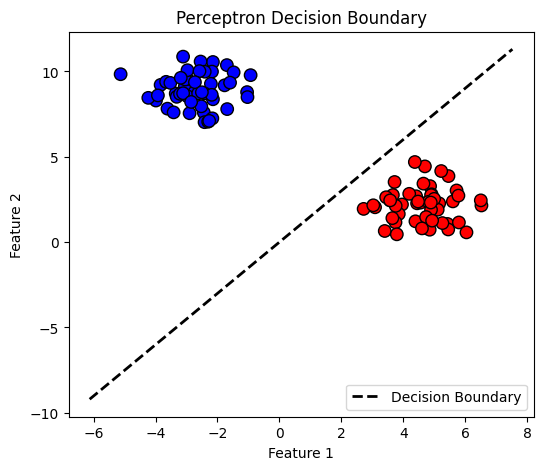

In [ ]:
# Your decision boundary plotting code here
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    x_values = np.linspace(x_min, x_max, 100)
    y_values = -(model.weights[0] / model.weights[1]) * x_values - (model.bias / model.weights[1])
    
    plt.figure(figsize=(6,5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=80)
    plt.plot(x_values, y_values, 'k--', linewidth=2, label="Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Perceptron Decision Boundary")
    plt.legend()
    plt.show()
    
    
plot_decision_boundary(X, y, perceptron)



**Explanation (2–3 sentences):**



## Part 2 — Activation Functions

### Q4. Activation Function Implementation
Implement the following activation functions and their derivatives:
- Sigmoid
- Tanh
- ReLU
- Leaky ReLU
- Softmax

**Your Task:**
- For each activation function:
  - Write the forward pass formula.
  - Write the derivative formula.

**Table: Activation Function Formulas & Derivatives**
| Function   | Formula | Derivative |
|------------|---------|------------|
| Sigmoid    |         |            |
| Tanh       |         |            |
| ReLU       |         |            |
| Leaky ReLU |         |            |
| Softmax    |         |            |


In [5]:
%pip install tabulate


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
from tabulate import tabulate
import numpy as np

def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x): return sigmoid(x) * (1 - sigmoid(x))

def tanh(x): return np.tanh(x)
def tanh_derivative(x): return 1 - np.tanh(x)**2

def relu(x): return np.maximum(0, x)
def relu_derivative(x): return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01): return np.where(x > 0, x, alpha * x)
def leaky_relu_derivative(x, alpha=0.01): return np.where(x > 0, 1, alpha)

def softmax(x): 
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

def softmax_derivative(s): return np.diagflat(s) - np.dot(s, s.T)

table = [
    ["Sigmoid", "1 / (1 + e^(-x))", "sigmoid(x) * (1 - sigmoid(x))"],
    ["Tanh", "(e^x - e^(-x)) / (e^x + e^(-x))", "1 - tanh(x)^2"],
    ["ReLU", "max(0, x)", "1 if x > 0 else 0"],
    ["Leaky ReLU", "x if x > 0 else alpha*x", "1 if x > 0 else alpha"],
    ["Softmax", "e^(x_i) / Σ e^(x_j)", "softmax(x) * (1 - softmax(x)) (per element)"]
]

print(tabulate(table, headers=["Function", "Formula", "Derivative"], tablefmt="github"))


| Function   | Formula                         | Derivative                                  |
|------------|---------------------------------|---------------------------------------------|
| Sigmoid    | 1 / (1 + e^(-x))                | sigmoid(x) * (1 - sigmoid(x))               |
| Tanh       | (e^x - e^(-x)) / (e^x + e^(-x)) | 1 - tanh(x)^2                               |
| ReLU       | max(0, x)                       | 1 if x > 0 else 0                           |
| Leaky ReLU | x if x > 0 else alpha*x         | 1 if x > 0 else alpha                       |
| Softmax    | e^(x_i) / Σ e^(x_j)             | softmax(x) * (1 - softmax(x)) (per element) |


### Q5. Testing Activation Functions
1. Choose input values: `[-2, -1, 0, 1, 2]`.
2. Apply each activation function to these inputs.
3. Record the outputs in a table.

**Output Table:**
| Input | Sigmoid | Tanh | ReLU | Leaky ReLU | Softmax |
|-------|---------|------|------|------------|---------|
| -2    |         |      |      |            |         |
| -1    |         |      |      |            |         |
| 0     |         |      |      |            |         |
| 1     |         |      |      |            |         |
| 2     |         |      |      |            |         |


In [ ]:
import numpy as np
from tabulate import tabulate

def sigmoid(x): return 1 / (1 + np.exp(-x))
def tanh(x): return np.tanh(x)
def relu(x): return np.maximum(0, x)
def leaky_relu(x, alpha=0.01): return np.where(x > 0, x, alpha * x)
def softmax(x): return np.exp(x) / np.sum(np.exp(x))


inputs = np.array([-2, -1, 0, 1, 2], dtype=float)

softmax_vals = softmax(inputs)

table_data = []
for i, val in enumerate(inputs):
    table_data.append([
        val,
        np.round(sigmoid(val), 4),
        np.round(tanh(val), 4),
        np.round(relu(val), 4),
        np.round(leaky_relu(val), 4),
        np.round(softmax_vals[i], 4)
    ])

headers = ["Input", "Sigmoid", "Tanh", "ReLU", "Leaky ReLU", "Softmax"]
print(tabulate(table_data, headers=headers, tablefmt="github"))


|   Input |   Sigmoid |    Tanh |   ReLU |   Leaky ReLU |   Softmax |
|---------|-----------|---------|--------|--------------|-----------|
|      -2 |    0.1192 | -0.964  |      0 |        -0.02 |    0.0117 |
|      -1 |    0.2689 | -0.7616 |      0 |        -0.01 |    0.0317 |
|       0 |    0.5    |  0      |      0 |         0    |    0.0861 |
|       1 |    0.7311 |  0.7616 |      1 |         1    |    0.2341 |
|       2 |    0.8808 |  0.964  |      2 |         2    |    0.6364 |


### Q6. Visualization of Activation Functions
1. Plot each activation function for input range `[-5, 5]`.
2. Compare their shapes visually.

**Your Task:**
- Provide the plots for all activation functions.
- In **3–4 sentences**, explain how the choice of activation function can affect learning in a neural network.


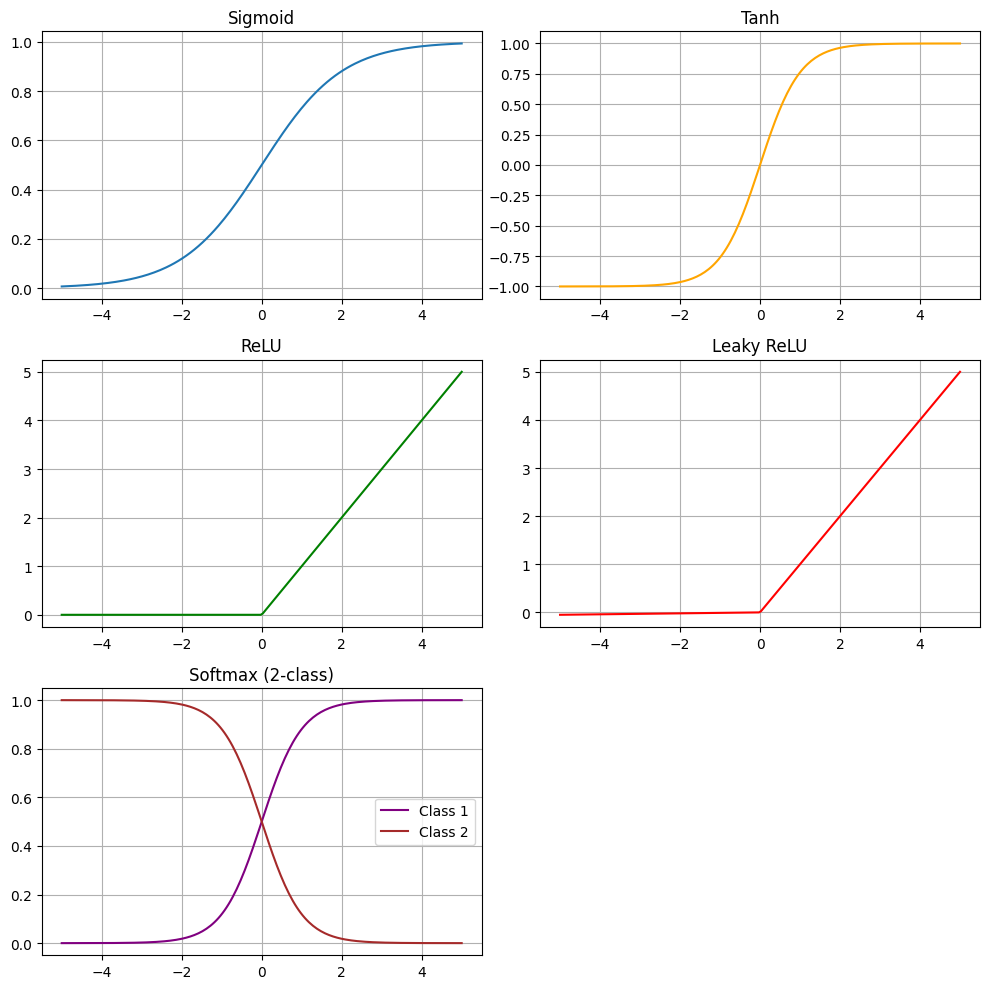

Activation functions control how signals pass through a network. Sigmoid and Tanh squash values, helping with bounded outputs but may cause vanishing gradients. ReLU is efficient and avoids saturation for positives but can lead to dead neurons. Leaky ReLU addresses this by keeping small gradients for negatives. Softmax converts scores into probabilities, useful for classification tasks.


In [10]:
# Your plotting code for activation functions here
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x): return 1 / (1 + np.exp(-x))
def tanh(x): return np.tanh(x)
def relu(x): return np.maximum(0, x)
def leaky_relu(x, alpha=0.01): return np.where(x > 0, x, alpha * x)
def softmax_2class(x):
    logits = np.vstack([x, -x])
    exp_vals = np.exp(logits - np.max(logits, axis=0))
    return exp_vals / np.sum(exp_vals, axis=0)

x = np.linspace(-5, 5, 200)

plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid")
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(x, tanh(x), color="orange")
plt.title("Tanh")
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(x, relu(x), color="green")
plt.title("ReLU")
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(x, leaky_relu(x), color="red")
plt.title("Leaky ReLU")
plt.grid(True)

plt.subplot(3, 2, 5)
soft_vals = softmax_2class(x)
plt.plot(x, soft_vals[0], label="Class 1", color="purple")
plt.plot(x, soft_vals[1], label="Class 2", color="brown")
plt.title("Softmax (2-class)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Activation functions control how signals pass through a network. Sigmoid and Tanh squash values, helping with bounded outputs but may cause vanishing gradients. ReLU is efficient and avoids saturation for positives but can lead to dead neurons. Leaky ReLU addresses this by keeping small gradients for negatives. Softmax converts scores into probabilities, useful for classification tasks.")

**Explanation (3–4 sentences):**



Activation functions control how signals pass in a network.
Sigmoid and tanh can slow learning.
ReLU is faster but can get stuck at zero.
Swish and softplus are smoother but slower.
